In [ ]:
import torch
import numpy as np

In [ ]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
print(inputs)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])


In [ ]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])


## Dataset

In [ ]:
from torch.utils.data import TensorDataset

dataset = TensorDataset(inputs, targets)

In [ ]:
dataset[:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

## DataLoader

In [ ]:
from torch.utils.data import DataLoader

batch_size = 3
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# A Batch Sample
for inp,target in train_loader:
    print(inp)
    print(target)
    break

tensor([[103.,  43.,  36.],
        [ 91.,  88.,  64.],
        [ 69.,  96.,  70.]])
tensor([[ 20.,  38.],
        [ 81., 101.],
        [103., 119.]])


## Linear Regression

In [ ]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.2218,  0.5240, -1.4822],
        [-1.7516,  0.0092, -0.0035]], requires_grad=True)
tensor([0.5682, 1.5696], requires_grad=True)


In [ ]:
def model(X):
    return X @ w.t() + b

In [ ]:
for x,y in train_loader:
    preds = model(x)
    print("Prediction is :\n",preds)
    print("\nActual targets is :\n",y)
    break

Prediction is :
 tensor([[ -44.9981, -127.5902],
        [ -34.4851, -149.7876],
        [ -67.4435, -116.8891]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[ 57.,  69.],
        [119., 133.],
        [102., 120.]])


### Loss

In [ ]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference) / difference.numel()

In [ ]:
for x,y in train_loader:
    preds = model(x)
    print("Prediction is :\n",preds)
    print("\nActual targets is :\n",y)
    print("\nLoss is: ",mse_loss(preds, y))
    break

Prediction is :
 tensor([[ -70.3737, -157.2504],
        [ -53.6209, -175.0647],
        [ -68.1893, -118.6499]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[ 80., 102.],
        [ 21.,  38.],
        [103., 119.]])

Loss is:  tensor(37761.8477, grad_fn=<DivBackward0>)


In [ ]:
epochs = 50
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y)
        loss.backward()
        # print(loss)
        # Let's update the weights
        with torch.no_grad():
            w -= w.grad *1e-5
            b -= b.grad * 1e-5
            # Set the gradients to zero
            w.grad.zero_()
            b.grad.zero_()
    print(f"Epoch {i}/{epochs}: Loss: {loss}")

Epoch 0/50: Loss: 35.931575775146484
Epoch 1/50: Loss: 160.37486267089844
Epoch 2/50: Loss: 220.2587890625
Epoch 3/50: Loss: 165.05255126953125
Epoch 4/50: Loss: 162.80003356933594
Epoch 5/50: Loss: 114.59156036376953
Epoch 6/50: Loss: 214.3457794189453
Epoch 7/50: Loss: 76.0345687866211
Epoch 8/50: Loss: 78.63240051269531
Epoch 9/50: Loss: 32.64655685424805
Epoch 10/50: Loss: 74.9374008178711
Epoch 11/50: Loss: 166.5984649658203
Epoch 12/50: Loss: 93.26306915283203
Epoch 13/50: Loss: 160.2582244873047
Epoch 14/50: Loss: 92.41278076171875
Epoch 15/50: Loss: 78.94860076904297
Epoch 16/50: Loss: 182.65174865722656
Epoch 17/50: Loss: 139.17083740234375
Epoch 18/50: Loss: 96.36188507080078
Epoch 19/50: Loss: 162.49021911621094
Epoch 20/50: Loss: 96.892333984375
Epoch 21/50: Loss: 15.896259307861328
Epoch 22/50: Loss: 87.8724136352539
Epoch 23/50: Loss: 27.04206657409668
Epoch 24/50: Loss: 77.63746643066406
Epoch 25/50: Loss: 77.87267303466797
Epoch 26/50: Loss: 92.4762954711914
Epoch 27/50

## Results

In [ ]:
for x,y in train_loader:
    preds = model(x)
    print("Prediction is :\n",preds)
    print("\nActual targets is :\n",y)
    break

Prediction is :
 tensor([[ 71.7292,  99.2715],
        [ 71.9216,  98.2118],
        [ 85.8801, 118.2186]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[ 80., 102.],
        [ 82., 100.],
        [102., 120.]])


#Part 2

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [19]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

In [20]:
y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

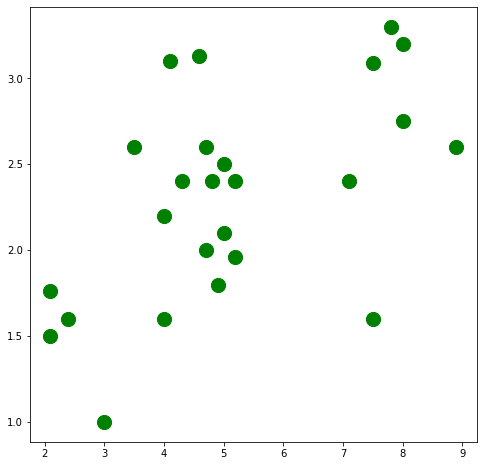

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=200, label='Original data')
plt.show()

In [22]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [24]:
input_size = 1 
hidden_size = 1
output_size = 1 
learning_rate = 0.001

In [25]:
w1 = torch.rand(input_size, 
                hidden_size, 
                requires_grad=True)

In [26]:
b1 = torch.rand(hidden_size, 
                output_size, 
                requires_grad=True)

In [27]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)
    loss = (y_pred - Y_train).pow(2).sum() 
    if iter % 100 ==0:
        print(iter, loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 7.322086334228516
200 6.488248825073242
300 6.232760906219482
400 6.154477119445801
500 6.130492210388184
600 6.123143672943115
700 6.120891094207764
800 6.12020206451416
900 6.119991302490234
1000 6.119925022125244
1100 6.119905948638916
1200 6.119898796081543
1300 6.119897365570068
1400 6.11989688873291
1500 6.11989688873291
1600 6.119897365570068
1700 6.11989688873291
1800 6.119895935058594
1900 6.11989688873291
2000 6.11989688873291
2100 6.11989688873291
2200 6.11989688873291
2300 6.11989688873291
2400 6.11989688873291
2500 6.11989688873291
2600 6.11989688873291
2700 6.11989688873291
2800 6.11989688873291
2900 6.11989688873291
3000 6.11989688873291
3100 6.11989688873291
3200 6.11989688873291
3300 6.11989688873291
3400 6.11989688873291
3500 6.11989688873291
3600 6.11989688873291
3700 6.11989688873291
3800 6.11989688873291
3900 6.11989688873291
4000 6.11989688873291


In [28]:
print ('w1: ', w1)
print ('b1: ', b1)

w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


In [36]:
predicted = X_train.mm(w1).clamp(min=0).add(b1)